# Custom SVR Tests

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from svr import *

# First test: linear example
Generating data points from a linear objective function with gaussian noise

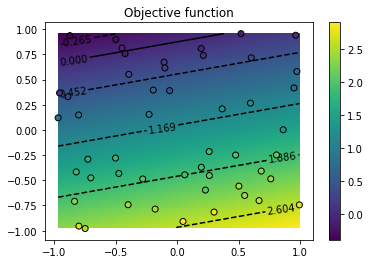

In [6]:
npoints = 50
noise = 0.1
w = np.random.randn(3)

X = np.random.rand(npoints, 2)*2 -1
y = np.matmul(X,w[:2])+w[2] + (np.random.randn(npoints)*noise)

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')

plt.axis('tight')
x1_min, x1_max, x2_min, x2_max = X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()
    
X1, X2 = np.mgrid[x1_min:x1_max:200j, x1_min:x2_max:200j]
Y = np.matmul(np.c_[X1.ravel(), X2.ravel()],w[:2])+w[2]

#color plot the original function
Y = Y.reshape(X1.shape)
mesh = plt.pcolormesh(X1, X2, Y)
con = plt.contour(X1, X2, Y, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(con, inline=1, fontsize=10)
zeroc = plt.contour(X1, X2, Y, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zeroc, inline=1, fontsize=10)
plt.colorbar(mesh, extendfrac='auto')

plt.title("Objective function")
plt.show()

Linear SVR
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Optimize a model with 1 rows, 100 columns and 100 nonzeros
Model has 5050 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e+00]
  QObjective range [1e-03, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.03s
Presolved: 1 rows, 100 columns, 100 nonzeros
Presolved model has 5050 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 2
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.00050000e+04  9.99950000e+04  1.00e+03 1.09e-13  1.00e+06     0s
   1  -1.00036047e+01  9.98951250e+04  6.65e-04 5.07e-13  1.00e+03     0s
   2  -4.96995029e+00  2.65520659e+04  4.00e-15 3.9

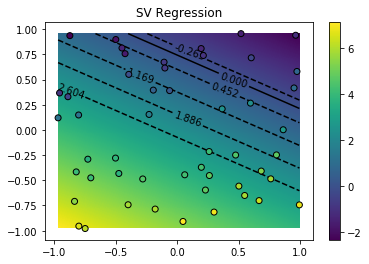

In [7]:
print("Linear SVR")
svr_lin = SVR(C=1.0, epsilon=0.1, kernel='linear', verbose=True)
svr_lin.fit(X,y)
print("Score: %f" % svr_lin.score(X,y))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ylsvr = svr_lin.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshlsvr = plt.pcolormesh(X1, X2, Ylsvr)
conlsvr = plt.contour(X1, X2, Ylsvr, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(conlsvr, inline=1, fontsize=10)
zeroclsvr = plt.contour(X1, X2, Ylsvr, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zeroclsvr, inline=1, fontsize=10)
plt.colorbar(meshlsvr, extendfrac='auto')

plt.title("SV Regression")
plt.show()

In [8]:
svr_lin.sv

[array([0.3665851 , 0.20904007]),
 array([ 0.26080835, -0.21459786]),
 array([ 0.23053375, -0.5967206 ]),
 array([-0.83441409, -0.70911762]),
 array([0.95145897, 0.41672527]),
 array([-0.95632942,  0.36702097]),
 array([ 0.47601653, -0.24927774]),
 array([-0.74813631, -0.97876573]),
 array([-0.47431514, -0.43232148]),
 array([-0.50097778, -0.27936333]),
 array([0.86331947, 0.0017871 ]),
 array([-0.06092487,  0.3904396 ]),
 array([-0.82064072, -0.41665267]),
 array([-0.88815899,  0.32981515]),
 array([0.59683783, 0.266265  ]),
 array([-0.72618074, -0.29049221]),
 array([ 0.50258473, -0.55767762]),
 array([ 0.0620918 , -0.44525311])]

In [11]:
print("SVR with grid search model selection\n")

X_TrainAndValidation, X_Test, y_TrainAndValidation, y_Test = train_test_split(X, y, test_size = 1/3)


param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'kernel': ['linear']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

svreg = GridSearchCV(SVR(), param_grid, cv=2)
svreg.fit(X_TrainAndValidation, y_TrainAndValidation)

print("Best parameters set found on development set:")
print(svreg.best_params_)
print("Test score: %f" % svreg.score(X_Test,y_Test))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ysvreg = svreg.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshsvreg = plt.pcolormesh(X1, X2, Ysvreg)
consvreg = plt.contour(X1, X2, Ysvreg, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(consvreg, inline=1, fontsize=10)
zerocsvreg = plt.contour(X1, X2, Ysvreg, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zerocsvreg, inline=1, fontsize=10)
plt.colorbar(meshsvreg, extendfrac='auto')

plt.title("SV Regression")
plt.show()

SVR with grid search model selection



TypeError: Cannot clone object '<svr.svr.SVR object at 0x7f27c17f14e0>' (type <class 'svr.svr.SVR'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.